## Q1 K-Means

Implement K-Means Clustering on the dataset at the following location :  https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

You are expected to do all necessary EDA, feature scaling and transforms.

First, arbitarily choose cluster value as 2. Then use the elbow method which was discussed in class to identify the best number of cluster. While exploring this, if you observe the need to consider inertia as a factor, do so with proper rationale.

Write a bried explanation as to how PCA can help with clustering in this example.

In [1102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

In [1103]:
df=pd.read_csv("Live_20210128.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [1104]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [1105]:
df=df.drop(["status_id","Column1","Column2","Column3","Column4","status_published"],axis=1)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [1106]:
from sklearn.preprocessing import LabelEncoder

labenc = LabelEncoder()

df["status_type"]=labenc.fit_transform(df["status_type"])
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [1107]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df2=ms.fit_transform(df)
df2=pd.DataFrame(df2,columns=df.columns)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(df)
# standardized_data

In [1108]:
df2

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [1109]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit_predict(df2)
    wcss.append(km.inertia_)

In [1110]:
wcss

[899.1609334281592,
 237.7572640441956,
 162.3851167026438,
 127.32002622169277,
 96.24989550305206,
 82.47629720808925,
 73.25845571698525,
 68.69067903960593,
 61.96101294195956,
 56.733633005910775]

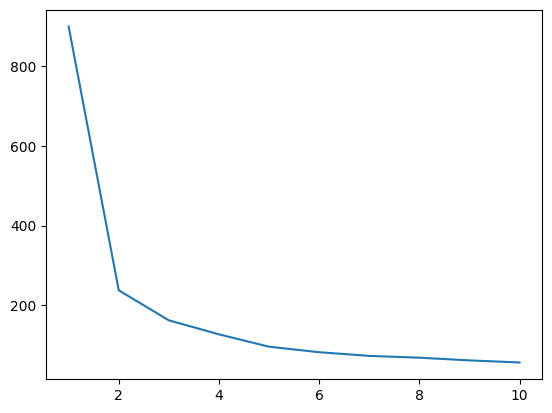

In [1111]:
plt.plot(range(1,11),wcss)

In [1112]:
X = df2
Y=df["status_type"]
Y

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int32

In [1113]:

km = KMeans(n_clusters=7,random_state=42)
km.fit(X)
labels = km.labels_

correct_labels = sum(Y == labels)
print("Result: Out of %d samples %d were correctly labeled." % (Y.size,correct_labels))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))

Result: Out of 7050 samples 5726 were correctly labeled.
Accuracy score: 0.81


In [1114]:
# y_means

## Q2 Loss Functions

Let the desired output to 10 inputs be,

> [0,1,0,0,1,0,0,1,1,1]


and let the corresponding actual output obtained from a machine be 


> [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


Find programmatically or by hand the loss obtained from using:

1.   a symmetric 0 − 1 loss function,

2.   the cross-entropy loss function and

3.   the hinge loss function.

If required assume a threshold of 0.5 to obtain a class from the machine output.  (sklearn by default uses 0.5 as threshold for binary classification) 

In [1115]:
desired_output = [0,1,0,0,1,0,0,1,1,1]
actual_output = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

loss = 0
for i in range(len(desired_output)):
  if desired_output[i] == actual_output[i]:
    loss += 0
  else:
    loss += 1

loss = loss / len(desired_output)
print(loss)


1.0


In [1116]:
import math

desired_output = [0,1,0,0,1,0,0,1,1,1]
actual_output = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

loss = 0
for i in range(len(desired_output)):
  loss += -(desired_output[i] * math.log(actual_output[i]) + (1 - desired_output[i]) * math.log(1 - actual_output[i]))

loss = loss / len(desired_output)
print(loss)


0.9162907318741551


In [1117]:

y = [0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
y_pred = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

ytrans = [-1 if yi == 0 else 1 for yi in y]

loss = 0


for i in range(len(ytrans)):
  loss += max(0, 1 - ytrans[i] * y_pred[i])


print( loss / len(ytrans))




1.0000000000000002
